The city of seattle wants to minimize costs and it wants to start with public sectors. When could seattle cut back upon the terry stops method of stopping. because it dosent lead to arrest. 

In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from datetime import datetime as dt
from sklearn.tree import  DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.compose import make_column_transformer
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, f1_score, precision_score,\
    classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
! pip install yellowbrick
from yellowbrick.classifier import classification_report
terry = pd.read_csv('Terry_Stops.csv')

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


# Overview 
## Terry Stops
In Terry v. Ohio (Links to an external site.), a landmark Supreme Court case in 1967-8, the court found that a police officer was not in violation of the "unreasonable search and seizure" clause of the Fourth Amendment, even though he stopped and frisked a couple of suspects only because their behavior was suspicious. Thus was born the notion of "reasonable suspicion", according to which an agent of the police may e.g. temporarily detain a person, even in the absence of clearer evidence that would be required for full-blown arrests etc. Terry Stops are stops made of suspicious drivers.

# Business Problem

### The stakeholder for this project is Valor for Blue https://www.valorforblue.org/

I was tasked with analyzing the different features corresponding to Terry stops 
 
the goal is to create a model that can predict whether or not an arrest will be made during the traffic stop to help officers be better prepared for the stops that take place

We are dealing with human life in our data and we want to prioritize safety and being the best preparedness possibe..  When there are any false predictions I want to emphasize false positives (youre going to jail even when you don't have to) over false Negative (You aren't going to jail when you should) 

This is due to the fact that we don't want to lose the lives of any of our officers and the more prepared they are for weapons the better the situation can be maintained and alliveated

The actionable plan will be to know when and what to train and when to send more experienced officers on terry stops vs the newbies

In [2]:
terry.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
1,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
2,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-
3,-,-1,20150000002351,45252,Field Contact,None,7591,1985,M,Hispanic or Latino,...,21:39:00,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-
4,-,-1,20150000002392,45365,Field Contact,None,7560,1986,M,White,...,07:39:00,-,-,-,SOUTH PCT 1ST W - R/S RELIEF,N,N,East,E,E2


In [3]:
# Data Understanding


In [4]:
terry.describe(datetime_is_numeric=True)

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,5.008800e+04,5.008800e+04,5.008800e+04,50088.000000
mean,3.278046e+09,2.017759e+13,4.986949e+09,1983.220951
std,5.775792e+09,9.209445e+10,8.259486e+09,9.080500
min,-1.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.016000e+13,1.931408e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,4.276495e+05,1985.000000
75%,7.727798e+09,2.019000e+13,1.055138e+10,1990.000000
max,3.134823e+10,2.022000e+13,3.134973e+10,1998.000000


Looking at the Information all of the information Dtypes is objects......Great!

In [5]:
terry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50088 entries, 0 to 50087
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         50088 non-null  object
 1   Subject ID                50088 non-null  int64 
 2   GO / SC Num               50088 non-null  int64 
 3   Terry Stop ID             50088 non-null  int64 
 4   Stop Resolution           50088 non-null  object
 5   Weapon Type               50088 non-null  object
 6   Officer ID                50088 non-null  object
 7   Officer YOB               50088 non-null  int64 
 8   Officer Gender            50088 non-null  object
 9   Officer Race              50088 non-null  object
 10  Subject Perceived Race    50088 non-null  object
 11  Subject Perceived Gender  50088 non-null  object
 12  Reported Date             50088 non-null  object
 13  Reported Time             50088 non-null  object
 14  Initial Call Type     

#  DataCleaning 

### We Want to clean up the data as to drop columns that do not have a direct influence on the stop or what could happen
#### Unfortunately Subjects Percieved Race will be the only sensitive data I am using today as that has a direct influence on the assumptions of the stop. 

In [6]:
#Column in Which We Dropped Everthing they do not help us answer the question

terry.drop(columns = ['Subject ID', 'GO / SC Num','Officer Squad','Terry Stop ID', 'Sector', 'Officer Gender', 'Call Type', 'Officer Race','Officer ID','Final Call Type','Reported Time','Initial Call Type', 'Precinct','Arrest Flag','Frisk Flag','Sector','Beat','Subject Perceived Gender'], inplace = True)
terry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50088 entries, 0 to 50087
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Subject Age Group       50088 non-null  object
 1   Stop Resolution         50088 non-null  object
 2   Weapon Type             50088 non-null  object
 3   Officer YOB             50088 non-null  int64 
 4   Subject Perceived Race  50088 non-null  object
 5   Reported Date           50088 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB



## Column Stop Resolution 

##### Focusing First on The results of the stop we want to get dummy for the stops to put them in there own columns. This way despite the presence of a weapon we can see how the stop was handled 



In [7]:
terry['Stop Resolution'].value_counts(normalize = True)

Field Contact               0.411176
Offense Report              0.322433
Arrest                      0.248143
Referred for Prosecution    0.014534
Citation / Infraction       0.003713
Name: Stop Resolution, dtype: float64

In [8]:
Target_Stop_Resolution = pd.get_dummies(terry['Stop Resolution'])
terry = pd.concat([terry, Target_Stop_Resolution], axis = 1)


In [9]:
terry.drop(columns = ['Stop Resolution'], inplace = True)

## Column Subject Age Group

#### Upon finding out the age of a person they are placed into an age group. If it is deemed that this particular age group is more often times carrying a weapon of sorts officers will be better prepared to deal with the presence of such an Item 

In [10]:
terry['Subject Age Group'].replace(to_replace = '-', value = '26 - 35', inplace = True)
#removing the dash in the age group and replacing the dash with the mode of the age group which is 26-35

In [11]:
terry['Subject Age Group'] = terry['Subject Age Group'].map({'26 - 35': 3, '36 - 45': 4, '18 - 25': 2,'46 - 55':5, '56 and Above': 6, '1 - 17':1})

#applying a general map to the age group this way theyy all fit into classes sort of like a bin 

In [12]:
terry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50088 entries, 0 to 50087
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         50088 non-null  int64 
 1   Weapon Type               50088 non-null  object
 2   Officer YOB               50088 non-null  int64 
 3   Subject Perceived Race    50088 non-null  object
 4   Reported Date             50088 non-null  object
 5   Arrest                    50088 non-null  uint8 
 6   Citation / Infraction     50088 non-null  uint8 
 7   Field Contact             50088 non-null  uint8 
 8   Offense Report            50088 non-null  uint8 
 9   Referred for Prosecution  50088 non-null  uint8 
dtypes: int64(2), object(3), uint8(5)
memory usage: 2.1+ MB


## Column Reported Date 

#### This column is a date and I just want to know if something was reported on that date so I can see if there is a correlation between months and weapons being present on the subject. 

In [13]:
Jan = terry[pd.to_datetime(terry['Reported Date']).dt.month ==1]
Feb = terry[pd.to_datetime(terry['Reported Date']).dt.month ==2]
Mar = terry[pd.to_datetime(terry['Reported Date']).dt.month ==3]
Apr = terry[pd.to_datetime(terry['Reported Date']).dt.month ==4]
May = terry[pd.to_datetime(terry['Reported Date']).dt.month ==5]
Jun = terry[pd.to_datetime(terry['Reported Date']).dt.month ==6]
Jul = terry[pd.to_datetime(terry['Reported Date']).dt.month ==7]
Aug = terry[pd.to_datetime(terry['Reported Date']).dt.month ==8]
Sep = terry[pd.to_datetime(terry['Reported Date']).dt.month ==9]
Oct = terry[pd.to_datetime(terry['Reported Date']).dt.month ==10]
Nov = terry[pd.to_datetime(terry['Reported Date']).dt.month ==11]
Dec = terry[pd.to_datetime(terry['Reported Date']).dt.month ==12]

In [14]:
Months = (Jan['Reported Date'],
Feb['Reported Date'],
Mar['Reported Date'],
Apr['Reported Date'],
May['Reported Date'],
Jun['Reported Date'],
Jul['Reported Date'],
Aug['Reported Date'],
Sep['Reported Date'],
Oct['Reported Date'],
Nov['Reported Date'],
Dec['Reported Date'])
Report_Date = pd.DataFrame(columns = Months)
#terry = pd.concat([terry,Jan['Reported Date'],Feb['Reported Date'],Mar['Reported Date'],Apr['Reported Date'],May['Reported Date'],
#Jun['Reported Date'],Jul['Reported Date'],Aug['Reported Date'],Sep['Reported Date'],Oct['Reported Date'],Nov['Reported Date'],
#Dec['Reported Date']], axis = 1)

In [15]:
Mar= Mar['Reported Date']
Apr= Apr['Reported Date']
May= May['Reported Date']
Jun= Jun['Reported Date']
Jul= Jul['Reported Date']
Aug= Aug['Reported Date']
Sep= Sep['Reported Date']
Oct= Oct['Reported Date']
Nov= Nov['Reported Date']
Dec= Dec['Reported Date']

In [16]:
le= LabelEncoder()

In [17]:
think = pd.DataFrame(data= Months).transpose()
think.columns = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sep','Oct','Nov','Dec']
Reported =think.le(other = 'DataFrame', axis = 1)

terry = pd.concat([terry, Reported], axis = 1)

In [18]:
terry = terry.drop(columns = ['Reported Date'])

In [19]:
terry['Jan'].value_counts()

False    45881
True      4207
Name: Jan, dtype: int64

In [20]:
terry['Feb'].value_counts()

False    46678
True      3410
Name: Feb, dtype: int64

In [21]:
terry['Mar'].value_counts()

False    46156
True      3932
Name: Mar, dtype: int64

In [22]:
terry['Apr'].value_counts()

False    45939
True      4149
Name: Apr, dtype: int64

In [23]:
terry['May'].value_counts()

False    45048
True      5040
Name: May, dtype: int64

In [24]:
terry['Jun'].value_counts()

False    45531
True      4557
Name: Jun, dtype: int64

In [25]:
terry['Jul'].value_counts()

False    45519
True      4569
Name: Jul, dtype: int64

In [26]:
terry['Aug'].value_counts()

False    45743
True      4345
Name: Aug, dtype: int64

In [27]:
terry['Sep'].value_counts()

False    46109
True      3979
Name: Sep, dtype: int64

In [28]:
terry['Oct'].value_counts()

False    45731
True      4357
Name: Oct, dtype: int64

In [29]:
terry['Nov'].value_counts()

False    46173
True      3915
Name: Nov, dtype: int64

In [30]:
terry['Dec'].sum()

3628

In [31]:
December = terry['Dec'].sum()
December.astype(int)
December

3628

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Arress Over Past Year')]

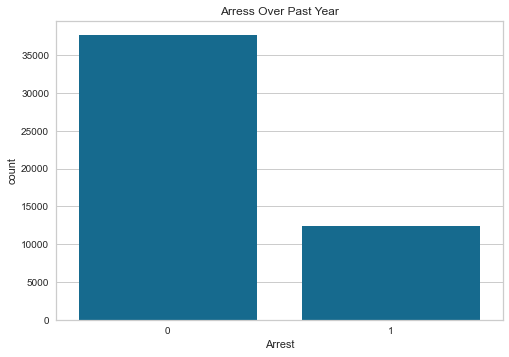

In [32]:
sns.countplot(terry['Arrest'], color = 'b').set(title = 'Arress Over Past Year')

### 50,088, Terry stops done last year 4174 a month at a 25 percent arrest rate that is 1044 people going to jail each month Based upon reasonabl suspicion 

## Column Weapon Type

#### I want to see what weapons are present the most as this column has a lot of repeat information we have to combine and replace prior to one hot encoding

In [33]:
terry['Weapon Type'].replace(to_replace = '-', value = 'None', inplace = True)
terry['Weapon Type'].replace(to_replace = 'None/Not Applicable', value = 'None', inplace = True)
terry['Weapon Type'].replace(to_replace = 'Firearm Other', value = 'Firearm', inplace = True)
terry['Weapon Type'].replace(to_replace = 'Blackjack', value = 'Club, Blackjack, Brass Knuckles', inplace = True)
terry['Weapon Type'].replace(to_replace = 'Club', value = 'Club, Blackjack, Brass Knuckles', inplace = True)
terry['Weapon Type'].replace(to_replace = 'Brass Knuckles', value = 'Club, Blackjack, Brass Knuckles', inplace = True)
terry['Weapon Type'].replace(to_replace = 'Other Firearm', value = 'Firearm', inplace = True)
terry['Weapon Type'].replace(to_replace = 'Firearm (unk type)', value = 'Firearm', inplace = True)
terry['Weapon Type'].replace(to_replace = 'Automatic Handgun', value = 'Handgun', inplace = True)
terry['Weapon Type'].replace(to_replace = 'Other Firearm', value = 'Firearm', inplace = True)

#One Hot encoding Weapon Type 
ohe = OneHotEncoder(categories='auto', sparse = False, handle_unknown = 'ignore')
Weapons = ohe.fit_transform(terry[['Weapon Type']])
ohe.categories_
Weapons_Used= pd.DataFrame(Weapons, columns =ohe.categories_)
terry = pd.concat([terry,Weapons_Used], axis = 1)
terry.drop(columns = ['Weapon Type'], inplace = True)

In [34]:
Weapons = pd.get_dummies(terry['Weapon Type'])
terry = pd.concat([terry, Weapons], axis = 1)
terry.drop(columns = ['Weapon Type'])

,Subject Age Group,Officer YOB,Subject Perceived Race,Arrest,Citation / Infraction,Field Contact,Offense Report,Referred for Prosecution,Jan,Feb,...,Firearm,Handgun,Knife/Cutting/Stabbing Instrument,Lethal Cutting Instrument,Mace/Pepper Spray,None,"Personal Weapons (hands, feet, etc.)",Rifle,Shotgun,Taser/Stun Gun
0,3,1965,-,0,0,1,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0
1,3,1961,White,0,0,1,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0
2,3,1977,Black or African American,0,0,1,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0
3,3,1985,Other,0,0,1,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0
4,3,1986,White,0,0,1,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50083,6,1989,Black or African American,0,0,1,0,0,False,False,...,0,0,1,0,0,0,0,0,0,0
50084,6,1973,Black or African American,0,0,1,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0
50085,6,1986,Black or African American,0,0,1,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0
50086,6,1976,Black or African American,0,0,1,0,0,False,False,...,0,0,0,0,0,1,0,0,0,0


In [35]:
terry = terry.rename({'None': 'No_Weapons'}, axis=1)  # new method

In [36]:
terry.columns

Index(['Subject Age Group', 'Weapon Type', 'Officer YOB',
       'Subject Perceived Race', 'Arrest', 'Citation / Infraction',
       'Field Contact', 'Offense Report', 'Referred for Prosecution', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec', 'Blunt Object/Striking Implement',
       'Club, Blackjack, Brass Knuckles', 'Fire/Incendiary Device', 'Firearm',
       'Handgun', 'Knife/Cutting/Stabbing Instrument',
       'Lethal Cutting Instrument', 'Mace/Pepper Spray', 'No_Weapons',
       'Personal Weapons (hands, feet, etc.)', 'Rifle', 'Shotgun',
       'Taser/Stun Gun'],
      dtype='object')

## Column Subject Percieved Race

#### Good to know if there is a certain race type when approaching if it is more common that they have a weapon present


In [37]:
terry['Subject Perceived Race'].value_counts()

White                                        24435
Black or African American                    14957
Unknown                                       3071
-                                             1805
Hispanic                                      1684
Asian                                         1665
American Indian or Alaska Native              1432
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       78
Name: Subject Perceived Race, dtype: int64

In [38]:
terry['Subject Perceived Race'].replace(to_replace = '-', value = 'Unknown', inplace = True)

In [39]:
terry['Subject Perceived Race'].value_counts()

White                                        24435
Black or African American                    14957
Unknown                                       4876
Hispanic                                      1684
Asian                                         1665
American Indian or Alaska Native              1432
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       78
Name: Subject Perceived Race, dtype: int64

## Modeling 

#### Beginning Our modeling buy Identifying the target. 

In [40]:
X = terry.drop(['Arrest'], axis = 1)
y = terry['Arrest']

In [41]:
y.value_counts(normalize = True)

0    0.751857
1    0.248143
Name: Arrest, dtype: float64

Noticed the Dash as an age group replaced it with the MODE of the column to better help our model. As this column is also an object I will be mapping each range of ages to a number. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [43]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [44]:
X_train_cat = X_train.select_dtypes('object')
dummy = ohe.fit_transform(X_train_cat)
dummy_df = pd.DataFrame(dummy, columns=ohe.get_feature_names(), index=X_train_cat.index)

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
X_train_nums = X_train.select_dtypes(include=['float64', 'int64'])

ss = StandardScaler()
scaled = ss.fit_transform(X_train_nums)


scaled_df = pd.DataFrame(scaled, index=X_train_nums.index)
scaled_df.columns = X_train_nums.columns

In [46]:
X_train_clean = pd.concat([scaled_df, dummy_df], axis=1)
X_train_clean 

,Subject Age Group,Officer YOB,x0_Blunt Object/Striking Implement,"x0_Club, Blackjack, Brass Knuckles",x0_Fire/Incendiary Device,x0_Firearm,x0_Handgun,x0_Knife/Cutting/Stabbing Instrument,x0_Lethal Cutting Instrument,x0_Mace/Pepper Spray,...,x0_Taser/Stun Gun,x1_American Indian or Alaska Native,x1_Asian,x1_Black or African American,x1_Hispanic,x1_Multi-Racial,x1_Native Hawaiian or Other Pacific Islander,x1_Other,x1_Unknown,x1_White
47969,1.387282,0.418138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36378,0.550133,-0.026204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43914,1.387282,1.417905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22433,-0.287017,1.084649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48951,2.224432,0.307052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,-0.287017,-1.803568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
578,-0.287017,-1.470313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38616,0.550133,0.973564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2439,-0.287017,0.529223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_test_cat = X_test.select_dtypes('object')

dummy1 = ohe.transform(X_test_cat)
dummy_df1 = pd.DataFrame(dummy1, columns=ohe.get_feature_names(), index=X_test_cat.index)


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
X_test_nums = X_test.select_dtypes(include=['float64', 'int64'])

scaled = ss.transform(X_test_nums)

scaled_df1 = pd.DataFrame(scaled, index=X_test_nums.index)
scaled_df1.columns = X_test_nums.columns


In [49]:
X_test_clean = pd.concat([scaled_df1, dummy_df1], axis=1)
X_test_clean

,Subject Age Group,Officer YOB,x0_Blunt Object/Striking Implement,"x0_Club, Blackjack, Brass Knuckles",x0_Fire/Incendiary Device,x0_Firearm,x0_Handgun,x0_Knife/Cutting/Stabbing Instrument,x0_Lethal Cutting Instrument,x0_Mace/Pepper Spray,...,x0_Taser/Stun Gun,x1_American Indian or Alaska Native,x1_Asian,x1_Black or African American,x1_Hispanic,x1_Multi-Racial,x1_Native Hawaiian or Other Pacific Islander,x1_Other,x1_Unknown,x1_White
45402,1.387282,0.640308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9189,-1.124166,0.418138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17366,-0.287017,-2.358995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27878,-0.287017,1.306820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35550,0.550133,0.862479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48765,1.387282,0.862479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41176,0.550133,1.306820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31910,0.550133,-1.248142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46472,2.224432,0.640308,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
model = LogisticRegression(max_iter = 800 ,random_state= 42)

model.fit(X_train_clean, y_train)
model.score(X_train_clean, y_train),model.score(X_test_clean, y_test)

(0.7527576740703769, 0.75324416051108)

In [51]:
cv_scores = cross_val_score(model, X_train_clean, y_train, cv=3)
cv_scores

array([0.75196526, 0.7523396 , 0.75202156])

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


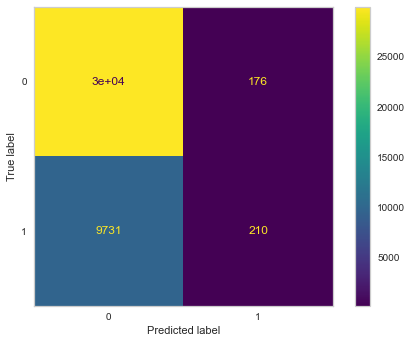

In [52]:
plot_confusion_matrix(model, X_train_clean, y_train);
plt.grid(False)

## We have a 75 percent accuracy for our Baseline lets see if we caan improve upon this 

1-17 = 1
18-25 = 2 
26-35 = 3 
36-45 = 4
46 - 55 = 5
56 and above = 6 

I do not want to drop any of my data so I will change the dash in 'Subject Precieved Race' to Unknown as that is a column within this then I will OHE as there aren't that many columns here that would be added on.

Converte the Date into A Datetime Object

75 percent of the officers Identify as white. Therfore it would skew any racial bias on my data set.

So I will drop this column as it has no correlation to my target factor of arrest.

I am combining weapon types to make less columns to be added on to my dataset


Condition_Weapon =df[['Weapon Type']]
weapon_ohe= OneHotEncoder(categories='auto', sparse = False, handle_unknown='ignore')
weapon_ohe.fit(Condition_Weapon)
weapon_ohe.categories_
weapon_encoded_train = weapon_ohe.transform(Condition_Weapon)
weapon_encoded_train
weapon_encoded_train = pd.DataFrame(weapon_encoded_train, columns =weapon_ohe.categories_)
weapon_encoded_train
df = pd.concat([df,weapon_encoded_train], axis = 1)
df.columns

## Random Forrest Classifier 

#### 76.96 

In [53]:
rfc = RandomForestClassifier(random_state=40)
rfc.fit(X_train_clean, y_train)

rfc.score(X_train_clean, y_train), rfc.score(X_test_clean, y_test)

(0.7693536311454954, 0.7485526053104412)

In [54]:
rfc.predict(X_test_clean)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


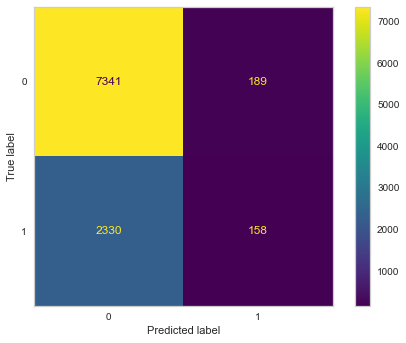

In [55]:
plot_confusion_matrix(rfc, X_test_clean, y_test);
plt.grid(False)

## Decisiion Tree Classifier
##### This model pretty ideally demonstrates that the time wasted behind terry stops is insane nothing is for sure it is al a 

In [56]:
dtc = DecisionTreeClassifier(random_state=42, max_depth= 3)
dtc.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [69]:
y_score_Dtc = model.fit(X_train_clean, y_train).decision_function(X_test_clean)

In [74]:
("Precision score: {}".format(precision_score(y_test,y_pred)))

'Precision score: 0.5688073394495413'

In [75]:
("Recall score: {}".format(recall_score(y_test,y_pred)))

'Recall score: 0.02491961414790997'

In [59]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 75.31443401876622


In [71]:
y_pred = dtc.predict(X_test_clean)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [89]:

plot_roc_curve(lr_base, X_train_clean, y_train)

TypeError: classification_report() missing 1 required positional argument: 'y_train'

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


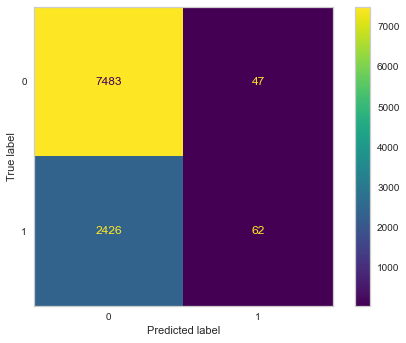

In [58]:
plot_confusion_matrix(dtc, X_test_clean, y_test);
plt.grid(False)

###### When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

In [60]:
dtc_ccp = DecisionTreeClassifier(random_state=42, ccp_alpha= .05)
dtc_ccp.fit(X_test_clean, y_test)
dtc_ccp.score(X_test_clean, y_test)

0.7516470353363945

This is getting into your testing training and spllitting.

In [61]:
y_pred = dtc_ccp.predict(X_test_clean)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


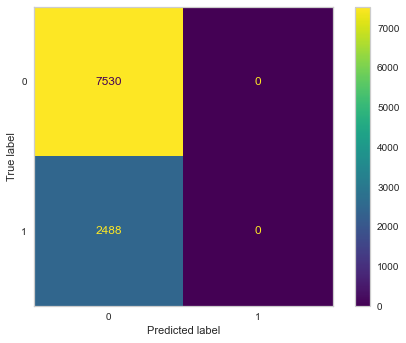

In [62]:
plot_confusion_matrix(dtc_ccp, X_test_clean, y_test);
plt.grid(False)

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


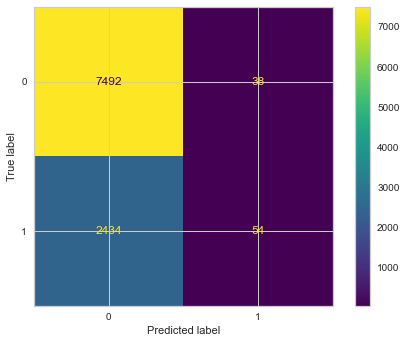

In [63]:
y_hat = model.predict(X_test_clean)
model_accuracy = accuracy_score(y_test, y_hat)
plot_confusion_matrix(model, X_test_clean, y_test)

# Recall = Sensitivity = 
 

## In words: How many of the terry stops  did my model identify?
### This is the most important question because we are tring to preserve and make the best use of our time if we are correctly catching all of the Terry Stops then our data of how manyy of these stops lead to arrrests becomes a lot more accurate. 

MAPPING 
LABEL ENCODER 
ONE HOT ENCODER

NameError: name 'rfc_params' is not defined

In [ ]:
DTR = DecisionTreeRegressor()